In [300]:
# import libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from feature_engine.encoding import RareLabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
import re

In [301]:
file_names = [f'2024_{i}.csv' for i in range(1, 10)]
file_names

['2024_1.csv',
 '2024_2.csv',
 '2024_3.csv',
 '2024_4.csv',
 '2024_5.csv',
 '2024_6.csv',
 '2024_7.csv',
 '2024_8.csv',
 '2024_9.csv']

In [302]:
dataframes = []

# combine the 10 csv 
for file_name in file_names:
    df = pd.read_csv(file_name)
    dataframes.append(df)

df = pd.concat(dataframes, ignore_index=True)

In [303]:
# eliminate the dupilicated rows and null value 
df = df.drop_duplicates()
df = df[df['CANCELLED']==0]
df = df.dropna(axis=0)

In [304]:
df.columns

Index(['YEAR', 'MONTH', 'DAY_OF_MONTH', 'FL_DATE', 'MKT_UNIQUE_CARRIER',
       'MKT_CARRIER_FL_NUM', 'ORIGIN_CITY_NAME', 'DEST_CITY_NAME',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'CRS_ARR_TIME', 'ARR_TIME',
       'ARR_DELAY', 'CANCELLED', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME',
       'AIR_TIME', 'DISTANCE'],
      dtype='object')

In [305]:
df['FlightDelay'] = df['ARR_DELAY'] - df['DEP_DELAY']
df.sample(5).T

,4136066,3129337,1833691,2426834,2368827
YEAR,2024,2024,2024,2024,2024
MONTH,7,6,4,5,4
DAY_OF_MONTH,21,5,4,3,30
FL_DATE,7/21/2024 12:00:00 AM,6/5/2024 12:00:00 AM,4/4/2024 12:00:00 AM,5/3/2024 12:00:00 AM,4/30/2024 12:00:00 AM
MKT_UNIQUE_CARRIER,UA,F9,DL,AA,AA
MKT_CARRIER_FL_NUM,5865.0,685.0,2342.0,1940.0,764.0
ORIGIN_CITY_NAME,"Cedar Rapids/Iowa City, IA","Washington, DC","Chicago, IL","Memphis, TN","Charlotte, NC"
DEST_CITY_NAME,"Chicago, IL","Denver, CO","Atlanta, GA","Dallas/Fort Worth, TX","Austin, TX"
CRS_DEP_TIME,1510,700,2046,520,2050
DEP_TIME,1510.0,650.0,2049.0,514.0,2047.0


In [306]:
# calculate the 95% percentile and eliminate extream value 
q95 = df['DEP_DELAY'].quantile(0.95)
df = df[df['DEP_DELAY'] <= q95]

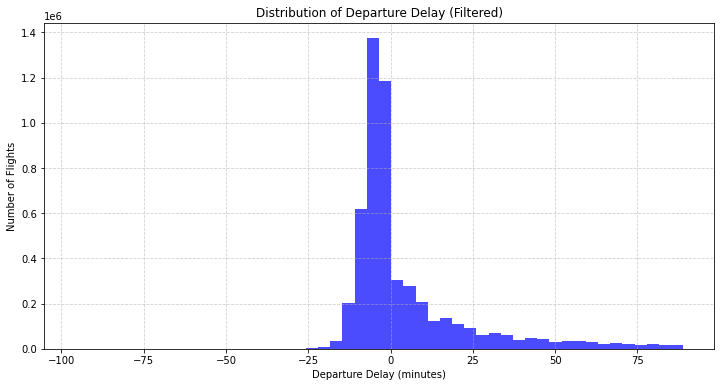

In [307]:
# calculate the 95% percentile and eliminate extream value 



plt.figure(figsize=(12, 6))
df['DEP_DELAY'].plot(kind='hist', bins=50, color='blue', alpha=0.7)

plt.title('Distribution of Departure Delay (Filtered)')
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Number of Flights')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [313]:
total_flights = df['DEP_DELAY'].count()  #
flights_less_than_zero = df[df['DEP_DELAY'] < 0].count()['DEP_DELAY']  

percentage_less_than_zero = (flights_less_than_zero / total_flights) * 100
percentage_less_than_zero

61.114065673136494

In [314]:
q95 = df['FlightDelay'].quantile(0.95)
df = df[df['FlightDelay'] <= q95]

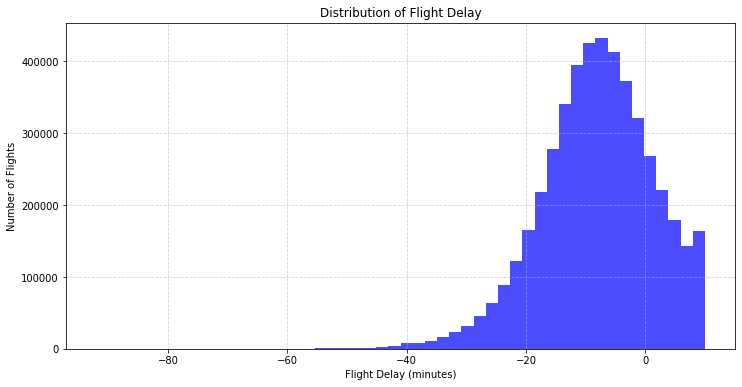

In [315]:
df['FlightDelay'] = pd.to_numeric(df['FlightDelay'], errors='coerce')  # 
plt.figure(figsize=(12, 6))
df['FlightDelay'].dropna().plot(kind='hist', bins=50, color='blue', alpha=0.7)

plt.title('Distribution of Flight Delay')
plt.xlabel('Flight Delay (minutes)')
plt.ylabel('Number of Flights')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [316]:

total_flights_flightdelay = df['FlightDelay'].count()  # total flight 
flights_flightdelay_less_than_zero = df[df['FlightDelay'] < 0].count()['FlightDelay']  # FlightDelay <0

percentage_flightdelay_less_than_zero = (flights_flightdelay_less_than_zero / total_flights_flightdelay) * 100
percentage_flightdelay_less_than_zero


79.51317131431333

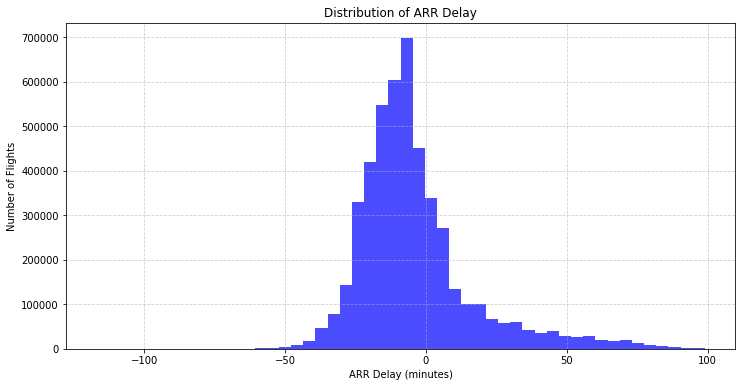

In [336]:
df['ARR_DELAY'] = pd.to_numeric(df['ARR_DELAY'], errors='coerce')  
plt.figure(figsize=(12, 6))
df['ARR_DELAY'].dropna().plot(kind='hist', bins=50, color='blue', alpha=0.7)

plt.title('Distribution of ARR Delay')
plt.xlabel('ARR Delay (minutes)')
plt.ylabel('Number of Flights')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [337]:
# calculate the arr_delay <0 percentage 
total_flights_flightdelay = df['ARR_DELAY'].count() 
flights_flightdelay_less_than_zero = df[df['ARR_DELAY'] < 0].count()['FlightDelay']  

percentage_flightdelay_less_than_zero = (flights_flightdelay_less_than_zero / total_flights_flightdelay) * 100
percentage_flightdelay_less_than_zero

70.20537403714539

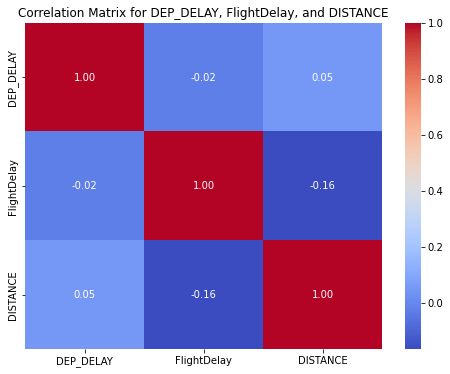

In [317]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 
df['DEP_DELAY'] = pd.to_numeric(df['DEP_DELAY'], errors='coerce')
df['DISTANCE'] = pd.to_numeric(df['DISTANCE'], errors='coerce')
df['FlightDelay'] = pd.to_numeric(df['FlightDelay'], errors='coerce')

# draw heatmap of the correlation 
plt.figure(figsize=(8, 6))
correlation_matrix = df[['DEP_DELAY', 'FlightDelay', 'DISTANCE']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix for DEP_DELAY, FlightDelay, and DISTANCE')
plt.show()



<Figure size 720x432 with 0 Axes>

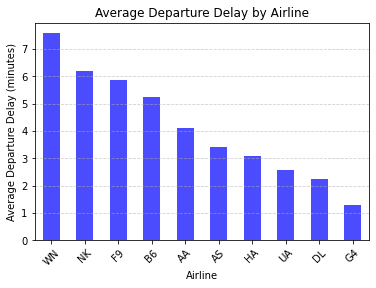

<Figure size 720x432 with 0 Axes>

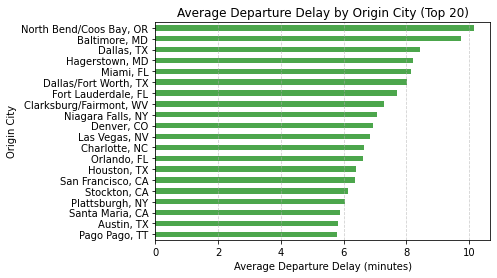

In [318]:
import matplotlib.pyplot as plt

# carriers average delay 
plt.figure(figsize=(10, 6))
delay_matrix_airline.sort_values(by='DEP_DELAY', ascending=False).plot(
    kind='bar', legend=False, color='blue', alpha=0.7
)
plt.title('Average Departure Delay by Airline')
plt.xlabel('Airline')
plt.ylabel('Average Departure Delay (minutes)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# 出发地前20个城市的平均延误柱状图
top20_origins = delay_matrix_origin.nlargest(20, 'DEP_DELAY')
plt.figure(figsize=(10, 6))
top20_origins.sort_values(by='DEP_DELAY', ascending=True).plot(
    kind='barh', legend=False, color='green', alpha=0.7
)
plt.title('Average Departure Delay by Origin City (Top 20)')
plt.xlabel('Average Departure Delay (minutes)')
plt.ylabel('Origin City')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()


In [319]:

df['MKT_CARRIER_FL_NUM'] = df['MKT_CARRIER_FL_NUM'].fillna(0).astype(int)  

# combine MKT_UNIQUE_CARRIER and MKT_CARRIER_FL_NUM  to flight_code
df['flight_code'] = df['MKT_UNIQUE_CARRIER'] + df['MKT_CARRIER_FL_NUM'].astype(str)

print(df[['MKT_UNIQUE_CARRIER', 'MKT_CARRIER_FL_NUM', 'flight_code']])

        MKT_UNIQUE_CARRIER  MKT_CARRIER_FL_NUM flight_code
0                       AA                1002      AA1002
1                       AA                1007      AA1007
2                       AA                1009      AA1009
3                       AA                1010      AA1010
4                       AA                1011      AA1011
...                    ...                 ...         ...
5644139                 WN                 996       WN996
5644140                 WN                 997       WN997
5644141                 WN                 997       WN997
5644142                 WN                 998       WN998
5644143                 WN                 999       WN999

[4769152 rows x 3 columns]


In [320]:
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'])
df['Day'] = df['FL_DATE'].dt.day_name()

df['DepHour'] = df['DEP_TIME'] // 100
df['DepMinute'] = df['DEP_TIME'] % 100
# More precise time representation (hour + fraction of the hour)
df['DepFraction'] = df['DepHour'] + df['DepMinute'] / 60
df['DepTime_sin'] = np.sin(2 * np.pi * df['DepFraction'] / 24)
df['DepTime_cos'] = np.cos(2 * np.pi * df['DepFraction'] / 24)

/var/folders/50/sdcn29lj1mxdbpljy43k22y00000gn/T/ipykernel_58914/978500603.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['FL_DATE'] = pd.to_datetime(df['FL_DATE'])


In [321]:
df['CRS_DepHour'] = df['CRS_DEP_TIME'] // 100
df['CRS_DepMinute'] = df['CRS_DEP_TIME'] % 100
# More precise time representation (hour + fraction of the hour)
df['CRS_DepFraction'] = df['CRS_DepHour'] + df['CRS_DepMinute'] / 60
df['CRS_DepTime_sin'] = np.sin(2 * np.pi * df['CRS_DepFraction'] / 24)
df['CRS_DepTime_cos'] = np.cos(2 * np.pi * df['CRS_DepFraction'] / 24)

In [322]:
df.sample(5).T

,3383688,679258,317848,5642411,5407233
YEAR,2024,2024,2024,2024,2024
MONTH,6,2,1,9,9
DAY_OF_MONTH,17,6,17,30,19
FL_DATE,2024-06-17 00:00:00,2024-02-06 00:00:00,2024-01-17 00:00:00,2024-09-30 00:00:00,2024-09-19 00:00:00
MKT_UNIQUE_CARRIER,AA,AA,WN,WN,UA
MKT_CARRIER_FL_NUM,5807,303,20,3372,3641
ORIGIN_CITY_NAME,"Montgomery, AL","Dallas/Fort Worth, TX","Dallas, TX","Dallas, TX","Newark, NJ"
DEST_CITY_NAME,"Charlotte, NC","Spokane, WA","Pensacola, FL","Austin, TX","Columbus, OH"
CRS_DEP_TIME,1326,1856,1250,800,905
DEP_TIME,1314.0,1933.0,1254.0,827.0,857.0


In [329]:
for col in ['MKT_UNIQUE_CARRIER', 'ORIGIN_CITY_NAME', 'DEST_CITY_NAME']:
    print(col)
    df[col] = df[col].fillna('None')
    encoder = RareLabelEncoder(n_categories=1, max_n_categories=200, replace_with='Other', tol=0.0001)
    new_col =col+'_new'
    df[new_col] = encoder.fit_transform(df[[col]])

MKT_UNIQUE_CARRIER


/Users/zhuhongjie/opt/anaconda3/lib/python3.9/site-packages/feature_engine/variable_manipulation.py:97: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  return is_numeric(pd.to_numeric(column, errors="ignore"))
/Users/zhuhongjie/opt/anaconda3/lib/python3.9/site-packages/feature_engine/variable_manipulation.py:101: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  return is_datetime(pd.to_datetime(column, errors="ignore", utc=True))
/Users/zhuhongjie/opt/anaconda3/lib/python3.9/site-packages/feature_engine/variable_manipulation.py:101: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  return is_datetime(pd.to_datetime(column, err

ORIGIN_CITY_NAME


/Users/zhuhongjie/opt/anaconda3/lib/python3.9/site-packages/feature_engine/variable_manipulation.py:97: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  return is_numeric(pd.to_numeric(column, errors="ignore"))
/Users/zhuhongjie/opt/anaconda3/lib/python3.9/site-packages/feature_engine/variable_manipulation.py:101: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  return is_datetime(pd.to_datetime(column, errors="ignore", utc=True))
/Users/zhuhongjie/opt/anaconda3/lib/python3.9/site-packages/feature_engine/variable_manipulation.py:101: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  return is_datetime(pd.to_datetime(column, err

DEST_CITY_NAME


/Users/zhuhongjie/opt/anaconda3/lib/python3.9/site-packages/feature_engine/variable_manipulation.py:97: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  return is_numeric(pd.to_numeric(column, errors="ignore"))
/Users/zhuhongjie/opt/anaconda3/lib/python3.9/site-packages/feature_engine/variable_manipulation.py:101: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  return is_datetime(pd.to_datetime(column, errors="ignore", utc=True))
/Users/zhuhongjie/opt/anaconda3/lib/python3.9/site-packages/feature_engine/variable_manipulation.py:101: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  return is_datetime(pd.to_datetime(column, err

In [330]:
df.sample(5).T

,1801348,5299515,5073654,5186738,355414
YEAR,2024,2024,2024,2024,2024
MONTH,4,9,9,9,1
DAY_OF_MONTH,2,14,3,9,19
FL_DATE,2024-04-02 00:00:00,2024-09-14 00:00:00,2024-09-03 00:00:00,2024-09-09 00:00:00,2024-01-19 00:00:00
MKT_UNIQUE_CARRIER,WN,DL,DL,AA,UA
MKT_CARRIER_FL_NUM,1388,5758,5341,2970,5439
ORIGIN_CITY_NAME,"Denver, CO","Jacksonville, FL","New York, NY","Chicago, IL","Chicago, IL"
DEST_CITY_NAME,"Reno, NV","New York, NY","Rochester, NY","Philadelphia, PA","Roanoke, VA"
CRS_DEP_TIME,855,709,950,530,1410
DEP_TIME,856.0,704.0,938.0,518.0,1519.0


In [331]:
df['ORIGIN_CITY_NAME'].value_counts()
counts = df['ORIGIN_CITY_NAME'].value_counts()
other_count = counts.get('Other', 0) 
print(f"Number of 'Other': {other_count}")
unique_count = df['ORIGIN_CITY_NAME'].nunique()
print(f"Number of unique values: {unique_count}")

Number of 'Other': 0
Number of unique values: 350


In [332]:
counts = df['DEST_CITY_NAME'].value_counts()
other_count = counts.get('Other', 0) 
print(f"Number of 'Other': {other_count}")
unique_count = df['DEST_CITY_NAME'].nunique()
print(f"Number of unique values: {unique_count}")

Number of 'Other': 0
Number of unique values: 350


In [333]:
for col in ['DISTANCE', 'DEP_DELAY', 'FlightDelay']:
    print(df[col].value_counts())

DISTANCE
337.0     24072
399.0     23335
224.0     21876
296.0     21022
594.0     19315
          ...  
1687.0        2
105.0         1
2154.0        1
2062.0        1
2390.0        1
Name: count, Length: 1607, dtype: int64
DEP_DELAY
-5.0     363462
-4.0     338554
-3.0     321620
-6.0     303597
-2.0     289886
          ...  
-96.0         1
-62.0         1
-56.0         1
-48.0         1
-52.0         1
Name: count, Length: 143, dtype: int64
FlightDelay
-8.0     216924
-7.0     215374
-9.0     215317
-10.0    210266
-6.0     209898
          ...  
-87.0         1
-91.0         1
-92.0         1
-85.0         1
-84.0         1
Name: count, Length: 99, dtype: int64


In [334]:
df.to_csv('2024_clean.csv', index=False)

In [32]:
df['ORIGIN_CITY_NAME']

0                    Madison, WI
1                  Charlotte, NC
2               Philadelphia, PA
3          Dallas/Fort Worth, TX
4                  Las Vegas, NV
                   ...          
5644139            Nashville, TN
5644140            Baltimore, MD
5644141                Greer, SC
5644142          San Antonio, TX
5644143               Denver, CO
Name: ORIGIN_CITY_NAME, Length: 5539508, dtype: object